## 4.2 Feed Forward NN Implementation 

In [16]:
import numpy as np
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

# Flatten the images
train_X = train_X.reshape(60000, 784).astype('float32')
test_X = test_X.reshape(10000, 784).astype('float32')

# Normalize pixel values
train_X /= 255
test_X /= 255

# Convert labels to one-hot encoding
train_y_one_hot = np.eye(10)[train_y]
test_y_one_hot = np.eye(10)[test_y]


X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [26]:
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights
        self.W1 = np.random.randn(hidden_size, input_size) * 0.01
        self.W2 = np.random.randn(output_size, hidden_size) * 0.01

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def forward(self, x):
        self.z1 = np.dot(x, self.W1.T)
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2.T)
        self.y_hat = self.softmax(self.z2)
        return self.y_hat

    def backward(self, x, y, y_hat):
        # Gradient of loss w.r.t. W2
        delta2 = y_hat - y
        dW2 = np.dot(delta2.T, self.a1)

        # Gradient of loss w.r.t. W1
        delta1 = np.dot(delta2, self.W2) * self.a1 * (1 - self.a1)
        dW1 = np.dot(delta1.T, x)

        return dW1, dW2

    def update_weights(self, dW1, dW2, learning_rate):
        self.W1 -= learning_rate * dW1
        self.W2 -= learning_rate * dW2

    def compute_loss(self, y, y_hat):
        m = y.shape[0]
        log_likelihood = -np.log(y_hat[range(m), y.argmax(axis=1)])
        loss = np.sum(log_likelihood) / m
        return loss

    def predict(self, x):
        y_hat = self.forward(x)
        return np.argmax(y_hat, axis=1)

    def train(self, train_X, train_y, epochs, learning_rate, batch_size):
        history = {'loss': []}
        for epoch in range(epochs):
            permutation = np.random.permutation(train_X.shape[0])
            train_X_shuffled = train_X[permutation]
            train_y_shuffled = train_y[permutation]

            for i in range(0, train_X.shape[0], batch_size):
                # Mini-batch
                x_batch = train_X_shuffled[i:i + batch_size]
                y_batch = train_y_shuffled[i:i + batch_size]

                # Forward pass
                y_hat = self.forward(x_batch)

                # Backward pass
                dW1, dW2 = self.backward(x_batch, y_batch, y_hat)

                # Update weights
                self.update_weights(dW1, dW2, learning_rate)

            # Calculate and store the loss after each epoch
            loss = self.compute_loss(train_y, self.forward(train_X))
            history['loss'].append(loss)
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

        return history
    
    def test(self, test_X, test_y):
        loss = self.compute_loss(test_y, self.forward(test_X))
        print(f"Test Loss: {loss:.4f}")
        return loss
    
    def count_misclassifications(self, x, y):
        predictions = self.predict(x)
        actual_labels = np.argmax(y, axis=1)
        misclassifications = np.sum(predictions != actual_labels)
        return misclassifications

In [27]:
# Neural network parameters
input_size = 784   # MNIST images are 28x28 pixels
hidden_size = 300  # d1 = 300
output_size = 10   # MNIST has 10 classes (digits 0-9)

# Create the neural network
nn = SimpleNeuralNetwork(input_size, hidden_size, output_size)

# Train the neural network
epochs = 10
learning_rate = 0.1
batch_size = 64
history = nn.train(train_X, train_y_one_hot, epochs, learning_rate, batch_size)

Epoch 1/10, Loss: 0.7626
Epoch 2/10, Loss: 0.4881
Epoch 3/10, Loss: 0.4505
Epoch 4/10, Loss: 0.3902
Epoch 5/10, Loss: 0.3281
Epoch 6/10, Loss: 0.3315
Epoch 7/10, Loss: 0.2980
Epoch 8/10, Loss: 0.2864
Epoch 9/10, Loss: 0.2625
Epoch 10/10, Loss: 0.2425


In [28]:
loss = nn.test(test_X, test_y_one_hot)
misclassifications = nn.count_misclassifications(test_X, test_y_one_hot)
print(f"Number of misclassifications: {misclassifications}")

Test Loss: 0.2804
Number of misclassifications: 764


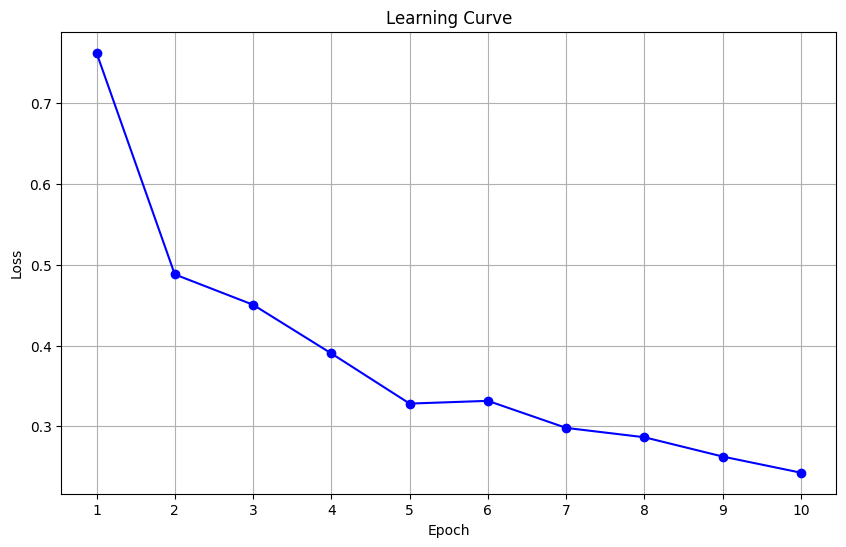

In [29]:
import matplotlib.pyplot as plt

losses = [0.7626, 0.4881, 0.4505, 0.3902, 0.3281, 0.3315, 0.2980, 0.2864, 0.2625, 0.2425]

# Epochs
epochs = range(1, 11)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, losses, marker='o', linestyle='-', color='b')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.xticks(epochs)
plt.show()